# Metabolomics of viral infection in mammalian cells 

Viral loads inside mammalian cells often put stress on its metabolism. Viruses often affect the carbohydrate and fatty acid metabolism of normal cells, wherein such changes have been implicated in weakening of the immunity, for eg, by allowing infected cells to survive. In order to design precise antiviral interventions, metabolomic studies using 13C Carbon labelling have become important.


## Global analysis of the data:PCA
Principal Component analysis (PCA) is a dimensionality reduction procedure that find can uncorrelated variables
 that account for maximum proportion of variance. In this problem, we will be using PCA on time series data of mock and infected cells, to find out metabolic differences at global level.
 


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv













raw_data=pd.read_csv("Maven_processed.csv")
uniV=raw_data['compound'].unique()
grouped = raw_data.groupby('compound')
tl=len(uniV)


#cols=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
pca_viral=pd.DataFrame()
ic=0
while ic < tl:
#for ic in uniV:\

#collect=uniV[ic]
    accoa = grouped.get_group(uniV[ic])

    sum_metvar=accoa.sum(axis=0)
    

   
    sum_metvar_arr=sum_metvar[[15,17,19,21,23,25,27,29,14,16,18,20,22,24,26,28]]
    #Ordering of mock and infected from 0 to 240 minutes and selecting only these columns
    
    
    pca_viral=pca_viral.append(sum_metvar_arr,ignore_index=True,sort=False)
    #Time Order is somehow not mainatined after appending.
    #After appending the order is
    #Mock-[1,7,11,15,5,13,3,9]
    #Infected-[2,8,12,16,6,14,4,10]
    
    #pca_viral=pca_viral.join(sum_metvar_arr)
    
    
    ic+=1


export_csv=pca_viral.to_csv(r'pca_viral_revised.csv',index=False,header=True)





The total pool intensities of all the metabolites, retrieved from EI-Maven processed file is in the file 'pca_viral.csv'. The variables are organized asper the random order mentioned in the code. The below python code gives the explained variance ratio. We can notice that the first principal component captures the maximum proportion of variance.

Now, in order to plot and interpret the PCA directions, I have used Matlab, for which the code is given below

## Matlab code  plotting of principal directions 
clearvars
raw_viral=csvread('pca_viral_matlab.csv');
%Matlab hates headers. Hence header is deleted from pca_viral_revised)

[coeff,score,latent,tsquared,explained,mu]=pca(raw_viral(1:end,:),'NumComponents',16); 
%Here coeff returns the principal component coefficients. Score represents raw_viral in the %principal component space.We will be using the coeff and space arguments to plot the first %two principal components

%Data for observations 
obsl={'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34'};

%Biplot 

biplot(coeff(:,1:2),'scores',score(:,1:2),'ObsLabels',obsl,'varlabels',{'v_1','v_2','v_3','v_4','v_5','v_6','v_7','v_8',...
    'v_9','v_10','v_11','v_12','v_13','v_14','v_15','v_16'});%Data for variables

set(gca,'FontName','Arial','FontSize',32,'FontWeight','Bold','LineWidth',4)
axis('square')
box on

#### The plot is saved as 'pca_analysis.tif' in the repo.

### Data transformation on intensity values for PCA makes sense since, the same is reuired to ensure normality of the data. Note that Matlab performs normalisation of data by default.


In [81]:
plt.style.use('ggplot')
infec_data=pd.read_csv("pca_viral_revised.csv")
#infec_data.head()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

infec_data_tr = StandardScaler().fit_transform(infec_data)#Transforming data to ensure normality
pca=PCA(n_components=2)

pca.fit(infec_data_tr)
#X_pca= pca.transform(infec_data_tr)
#print("original_shape: ", infec_data_tr.shape)
#print("transformed shape", X_pca.shape)

#X_new=pca.inverse_transform(X_pca)
print("The explained variance for first two principal components is  " ,pca.explained_variance_ratio_[0] ," and " , pca.explained_variance_ratio_[1])

The explained variance for first two principal components is   0.96957130841  and  0.022554011249


## Interpretation from the PCA analysis

We notice conspicously that the mock (even numbered in the plot) and the virally infected (odd numbered) time courses are aligned orthogonally along the first two principal components (first and fourth quadrants). This suggests systemic changes in 13C accumulation observed with time in response to viral infection. 

## Total pool analysis of TCA and glycolysis metabolites

We now analyze the time-series courses of total pooled metabolites of the Glycolysis and TCA pathway. The time-series analysis would allow a qualitative assessment of chanelling of fluxes into the metabolite.

### TCA metabolites 


In [82]:
uniL=uniV.tolist()
infec_data.head()

,091215_0M,091215_0i,091215_120M,091215_120i,091215_15M,091215_15i,091215_1M,091215_1i,091215_240M,091215_240i,091215_3M,091215_3i,091215_45M,091215_45i,091215_5M,091215_5i
0,6427.2251,6503.0806,4410.6088,5.886886e+03,5229.4164,6686.2615,5159.0950,6107.0171,4069.2861,6.363792e+03,8815.3872,3450.4677,7892.4490,6.325641e+03,6754.8910,6133.9632
1,50200.0463,55669.0180,23238.4107,8.825622e+02,57182.0449,40536.0236,50456.4062,52683.6339,17905.3489,1.513454e+02,36353.4306,31244.6904,37903.7270,2.862184e+04,56053.8179,49597.0416
2,60413.1080,61772.9291,39794.7206,6.145493e+04,118278.0759,78406.6367,111530.1235,89868.6420,37950.3693,6.310342e+04,226178.8429,155617.5364,115493.6306,9.633929e+04,136185.5505,108654.8782
3,147071.5783,137086.9547,133915.7211,1.145241e+05,118865.4565,85681.6146,123769.0392,92986.4467,120481.0290,1.087169e+05,98701.2228,94935.5889,121786.1711,1.189770e+05,115915.4091,106487.5591
4,278280.3496,756832.2000,522698.0625,1.384759e+06,299766.5568,583504.4470,258639.4900,706346.4268,383561.3469,1.422142e+06,272454.0598,860283.2227,320039.0500,1.104323e+06,279852.6351,849609.7971


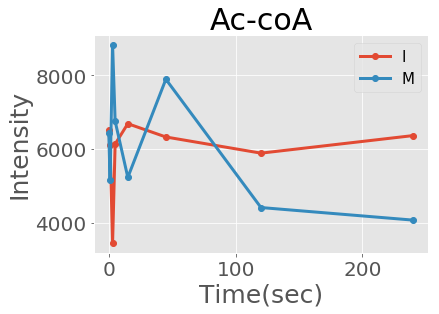

In [83]:
#Use the same dataframe infec_data to extract the required metabolites. 
#We have the orderly labels of the metabolites in the array UniV
#print(uniV)
uniL=uniV.tolist()

met_index=uniL.index('Acetyl CoA')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('Ac-coA',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()


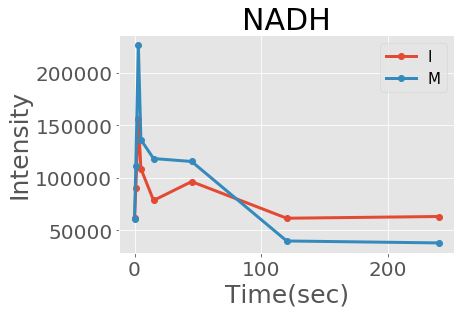

In [84]:
met_index=uniL.index('NADH')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('NADH',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

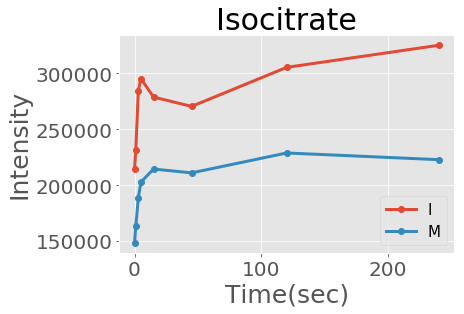

In [85]:
met_index=uniL.index('isocitrate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('Isocitrate',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

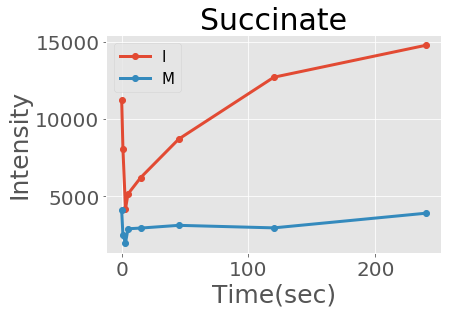

In [86]:
met_index=uniL.index('Succinate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('Succinate',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

### Glycolysis metabolites


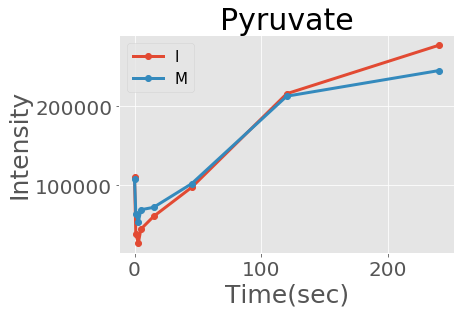

In [87]:
met_index=uniL.index('pyruvate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('Pyruvate',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

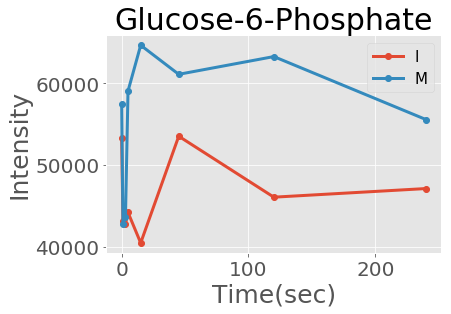

In [88]:
met_index=uniL.index('glucose-6-phosphate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('Glucose-6-Phosphate',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

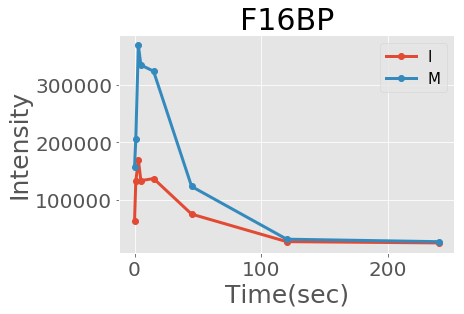

In [89]:
met_index=uniL.index('fructose-1-6-bisphosphate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,7,11,15,5,13,3,9]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('F16BP',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

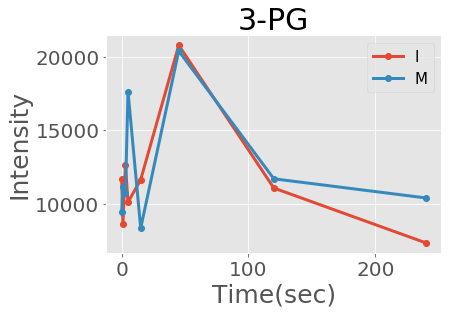

In [90]:
met_index=uniL.index('3 phosphoglycerate')
#print(met_index)


time=[0,1,3,5,15,45,120,240]
#print(time)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

com_var=infec_data.iloc[met_index,:]
#print(com_var)

plt.plot(time,com_var[[1,6,10,14,4,12,2,8]],marker='o',linewidth=3,label='I')
plt.plot(time,com_var[[0,5,9,13,3,11,1,7]],marker='o',linewidth=3,label='M')
plt.xlabel('Time(sec)',fontsize=25)
plt.ylabel('Intensity',fontsize=25)
plt.title('3-PG',fontsize=30)
plt.legend(prop={'size':15})   
plt.show()

### Analysis
The time course comparison of glycolysis and TCA cycle metabolites for mock and virally infected cells in general suggest increased total pool accumulation of metabolites in later, specifically for the ones that sit at the hub for amino acid and fatty acid synthesis (required for viral lipid coating).This include 3-Phosphoglycerate, Pyruvate and Acetyl coA. The Glucose-6-phoaphate 13C incorporation in virally infected cells is significantly less suggesting more flux directed towards pentose-phosphate pathway (required for nucleotide synthesis). 


### Fractional enrichment analysis
For qantitating the relative pathway activity we turn to fractional enrichment analysis. We specifically focus on presence of M+1 isotopologue of pyruvate for insight into the relative contribution  of glycolyis and pentose phosphate pathway. Furthermore, we will also compare M+5 isocitrate that possibly suggests the extent of pyruvate anaplerosis.

We focus on the 240 min time point assuming a psuedo steady state and compare percent enrichment.


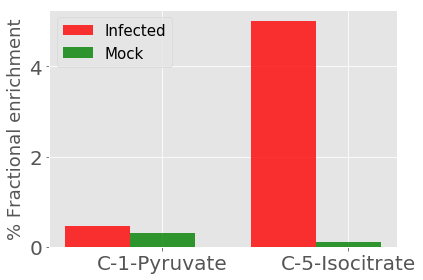

In [91]:
Per_enrich_I=[0.46,5]# Infected cells
Per_enrich_M=[0.31,0.1]# Mock sample

n_groups=2
bar_width=0.35
opacity=0.8

index=np.arange(n_groups)

rects1 = plt.bar(index, Per_enrich_I, bar_width,
alpha=opacity,
color='r',
label='Infected')

rects2 = plt.bar(index + bar_width, Per_enrich_M, bar_width,
alpha=opacity,
color='g',
label='Mock')
plt.xticks(index + bar_width, ('C-1-Pyruvate' , 'C-5-Isocitrate'))
plt.ylabel('% Fractional enrichment',fontsize=18)
plt.legend(prop={'size':15})

plt.tight_layout()
plt.show()

In case of Pyruvate, the above figure suggests that the relative activity of glycolysis and pentose phosphate pathway is negligibly different. NMR analysis of isotopomers of 13C (M+1) Pyruvate can shed more light on relative pathway contribution of the two pathways.

A significantly high enrichment of C-5-isocitrate suggests  relatively high levels of pyruvate anaplerosis. This high anaplerosis possibly shifts the infected cells metabolism towards de novo lipogenesis, a factor often contributing towards oncogenesis (Yu et al, Trends microbiol,2011)

#### In summary, the amino acid and fatty acid synthesis seem to be higher in virally infected cells. For more clarity on pentose phosphate pathway, NMR analysis of C1-labelled Pyruvate can be done.  